### Завдання 1
На основі файлу banking.csv виконайте наступні дії:
1. Сформуйте тестовий та тренувальний датасети (розмір тестової вибірки 0.3)
2. Застосуйте логістичну регресію для прогнозування цільової метрики y (ймовірність того, що клієнт відкриє вклад у банку) 
3. Оцініть модель за допомогою матриці похибок, метрик precision, recall, F1-score. Побудуйте AUC-ROC криву для моделі.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn. model_selection import train_test_split
from sklearn. linear_model import LogisticRegression
from sklearn import metrics

In [106]:
df= pd.read_csv('https://raw.githubusercontent.com/Startup-acdm/PDS1/550f2085ebc97c36c74b5c9b95d89e5dc7d10763/Lesson%2038/banking.csv?token=GHSAT0AAAAAAB5FDR3ZQS4Y62Z4DB66EGUMY7YMXUQ', index_col= 0)
y=np.array(df['y'])
df=df.drop(columns = ['y'],axis = 1)
numeric_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64']]
X = df[numeric_cols].copy()
X

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
age,,,,,,,,,
44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1
53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8
28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6
39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1
55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2
...,...,...,...,...,...,...,...,...,...
59,222,1,999,0,1.4,94.465,-41.8,4.866,5228.1
31,196,2,999,0,1.1,93.994,-36.4,4.860,5191.0
42,62,3,999,0,1.1,93.994,-36.4,4.857,5191.0


In [107]:
X_train,X_test,y_train,y_test = train_test_split (X,y,test_size=0.3,random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [108]:
y_pred = model.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[10596,   335],
       [  859,   567]], dtype=int64)

<AxesSubplot: >

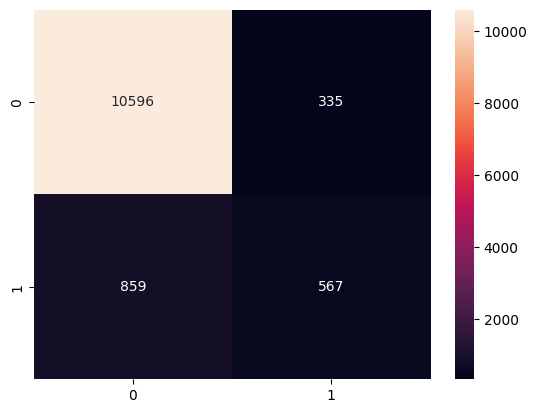

In [115]:
ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True, fmt='g', ax=ax)

In [111]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred, average = None))

Accuracy: 0.9033746054867686
Precision: 0.6286031042128604
Recall: 0.3976157082748948
F1: [0.94666309 0.4871134 ]


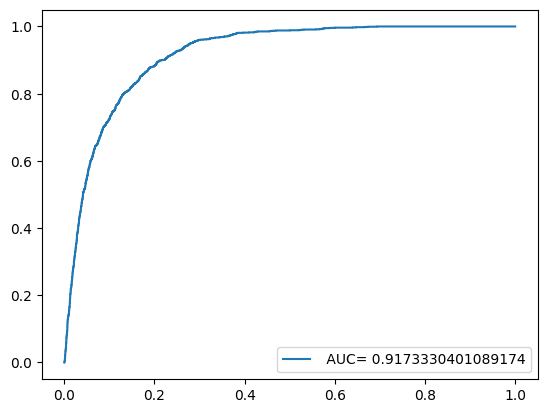

In [119]:
y_pred_proba = model.predict_proba (X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve (y_test, y_pred_proba)
auc = metrics.roc_auc_score (y_test, y_pred_proba)
plt.plot (fpr,tpr,label=" AUC= "+str(auc))
plt.legend(loc=4)
plt.show()